In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCH = 10
CHANNELS = 3

get the data

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/cherry_disease_classification/cherry_disease",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 1916 files belonging to 2 classes.


In [1]:
class_names = dataset.class_names
class_names

NameError: name 'dataset' is not defined

In [6]:
len(dataset)

60

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0]


In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[222. 211. 209.]
  [217. 206. 204.]
  [217. 206. 204.]
  ...
  [208. 196. 196.]
  [207. 195. 195.]
  [200. 188. 188.]]

 [[203. 192. 190.]
  [206. 195. 193.]
  [213. 202. 200.]
  ...
  [206. 194. 194.]
  [207. 195. 195.]
  [207. 195. 195.]]

 [[197. 186. 184.]
  [204. 193. 191.]
  [212. 201. 199.]
  ...
  [218. 206. 206.]
  [210. 198. 198.]
  [204. 192. 192.]]

 ...

 [[210. 199. 197.]
  [217. 206. 204.]
  [215. 204. 202.]
  ...
  [202. 191. 189.]
  [195. 184. 182.]
  [201. 190. 188.]]

 [[212. 201. 199.]
  [208. 197. 195.]
  [216. 205. 203.]
  ...
  [196. 185. 183.]
  [223. 212. 210.]
  [223. 212. 210.]]

 [[226. 215. 213.]
  [208. 197. 195.]
  [218. 207. 205.]
  ...
  [203. 192. 190.]
  [236. 225. 223.]
  [206. 195. 193.]]]


visualize the data

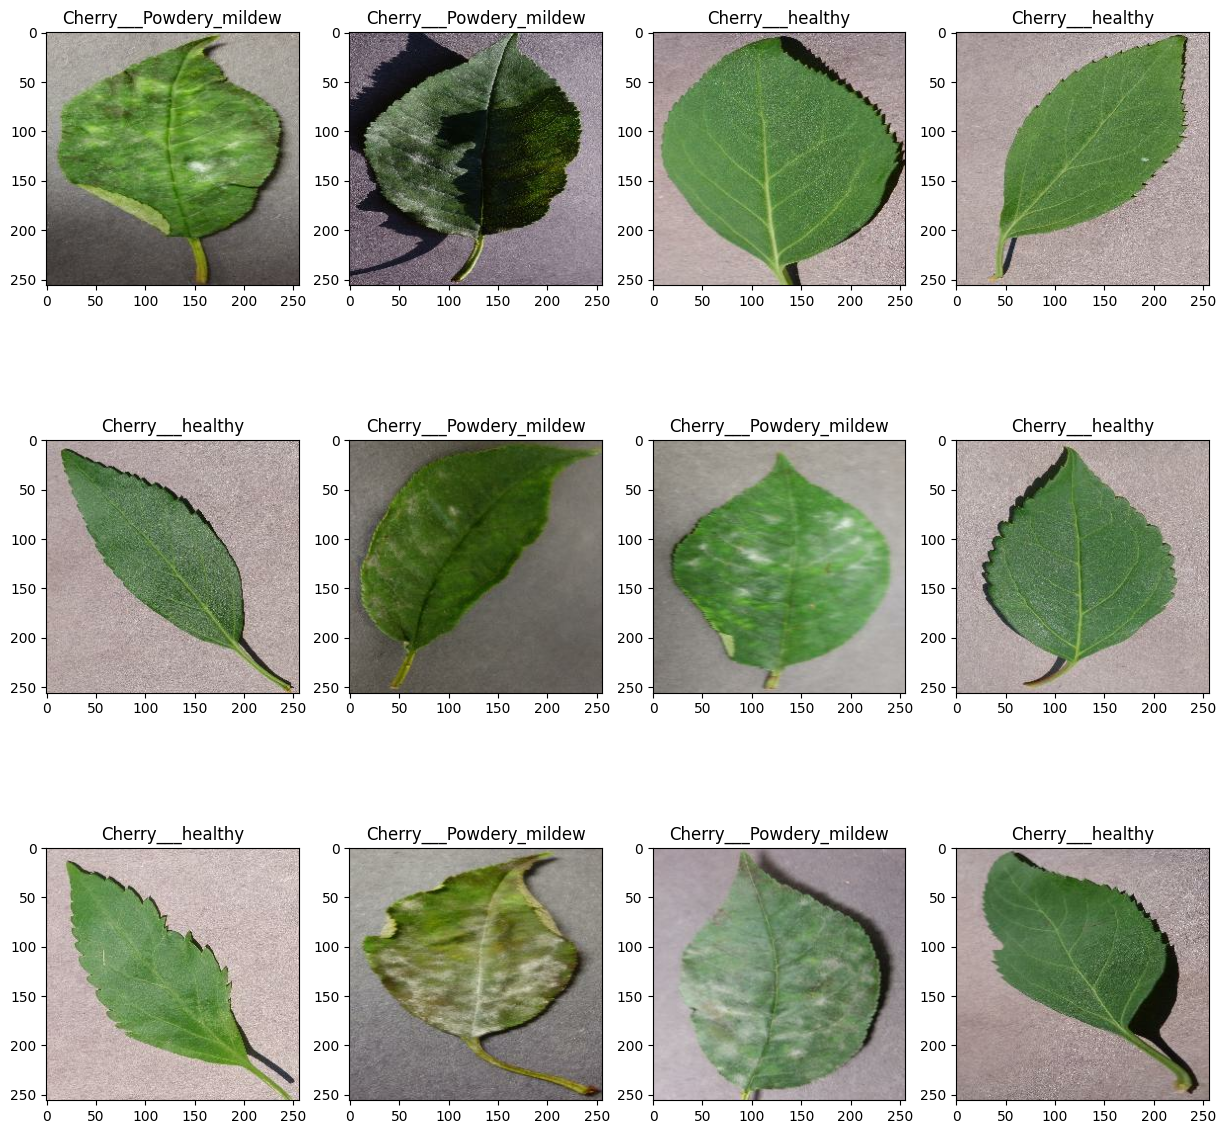

In [9]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])

splitting the data

In [10]:
# training data--> 80% , 20%--> for testing and validation
len(dataset)

60

In [11]:
 train_set = len(dataset)*0.8
 train_set

48.0

In [12]:
train_set =  dataset.take(48)
len(train_set)

48

In [13]:
test_set = dataset.skip(48)
len(test_set)

12

In [14]:
#split the remaining 20% into 10% ->validation and 10% ->test
len(dataset)*0.1

6.0

In [15]:
valid_set = test_set.take(6)
len(valid_set)

6

In [16]:
test_set = test_set.skip(6)
len(test_set)

6

In [17]:
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_set = valid_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

preprocessing pipeline

In [18]:
#resizing and rescaling the images
resize_rescale = tf.keras.Sequential([
                    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                    layers.Rescaling(1.0/255)
                     ])

In [19]:
#data augmentation
data_augmentation = tf.keras.Sequential([
                      layers.RandomFlip("horizontal_and_vertical"),
                      layers.RandomRotation(0.2)
                  ])

build and train the model

In [20]:
n_classes = 2

my_model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    resize_rescale,
    data_augmentation,
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
my_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,562 (947.51 KB)

 Trainable params: 242,562 (947.51 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
my_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [24]:
history = my_model.fit(
    train_set,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=valid_set,
    callbacks=[early_stopping]
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.7029 - loss: 0.5448 - val_accuracy: 0.8438 - val_loss: 0.3307
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9332 - loss: 0.1785 - val_accuracy: 0.9167 - val_loss: 0.2360
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9613 - loss: 0.1024 - val_accuracy: 0.9219 - val_loss: 0.1945
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9696 - loss: 0.0816 - val_accuracy: 0.9531 - val_loss: 0.1779
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9908 - loss: 0.0514 - val_accuracy: 0.9375 - val_loss: 0.2471
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9737 - loss: 0.0823 - val_accuracy: 0.9479 - val_loss: 0.1738
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9849 - loss: 0.0566 - val_accuracy: 0.9635 - val_loss: 0.1171
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9708 - loss: 0.0777 - val_accuracy: 0.9479 - v

evaluating the model

In [25]:
scores = my_model.evaluate(test_set)

6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 455ms/step - accuracy: 0.9700 - loss: 0.0845


In [26]:
scores

[0.07384607940912247, 0.9680851101875305]

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 48}

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

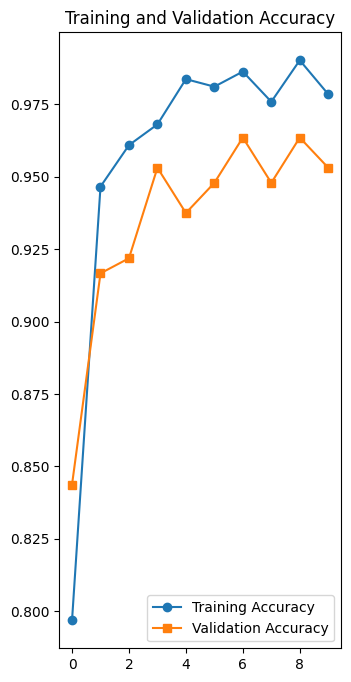

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), accuracy, marker='o', label='Training Accuracy')
plt.plot(range(EPOCH), val_accuracy, marker='s', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

make prediction on sample image

the image to predict: 
actual label:  Cherry___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
predicted label:  Cherry___healthy


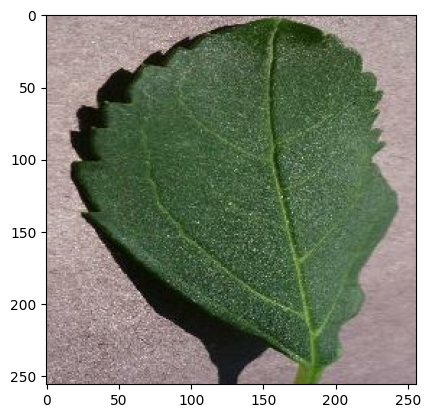

In [42]:
import numpy as np
for image_batch, label_batch in test_set.take(1):
    print('the image to predict: ')
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print('actual label: ',class_names[label_batch[0].numpy()])

    batch_prediction = my_model.predict(image_batch)
    print('predicted label: ',class_names[np.argmax(batch_prediction[0])])

make a function to take an image as input and make prediction

In [43]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #convert image into array so the model can process
  img_array = tf.expand_dims(img_array, 0)  #add extra dimension to the image(crate batch)

  predictions = my_model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 *(np.max(predictions[0])),2)  #to extract the highest probability and then convert into percentage
  return predicted_class,confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


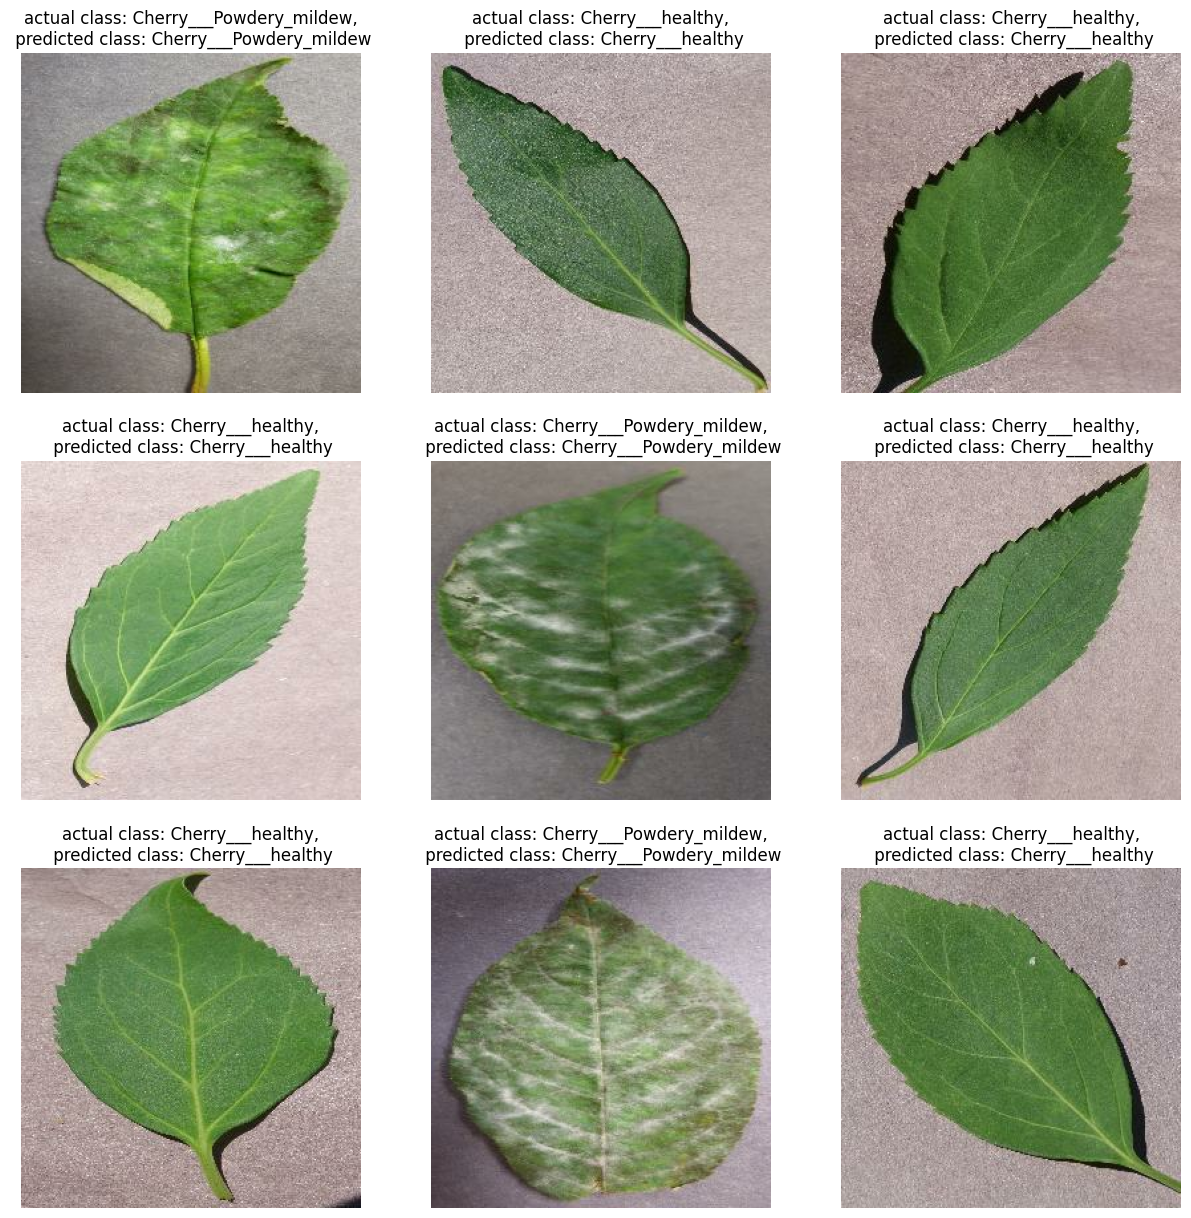

In [48]:
plt.figure(figsize=(15,15))
for images, labels in test_set.take(1):
    for i in range(9):
        axis = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidence = predict(my_model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'actual class: {actual_class},\n predicted class: {predicted_class}')

        plt.axis("off")

save the model

TypeError: cannot pickle 'module' object